[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_xgb_densenet121.ipynb)

In [1]:
"""For Alibaba Competition

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10DYDNSM_eaFtn7lrM0CyUIXRFdIDtabS
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse






Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


In [3]:

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [50]:

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
aoi_aoi_test1.ipynb  Sample upload.txt
aoi_test	     TAHU PowerPoint Template.pdf
Colab Notebooks      TAHU PowerPoint Template - 柱狀圖 1.ods
kaggle		     tai_future_data
mobilenet_ssd	     test for excel
PiXNet		     Untitled0.ipynb


In [5]:
!ls drive/kaggle/ali/manu_big_data

train_sample_total.zip	xgb_densenet12.pkl


In [0]:
!cp drive/kaggle/ali/manu_big_data/train_sample_total.zip .

In [13]:
!ls

adc.json  drive  train_sample_total.zip


In [14]:

!unzip train_sample_total.zip


Archive:  train_sample_total.zip
   creating: train_sample_total/
  inflating: train_sample_total/正常20180914144614对照样本_02.jpg  
   creating: __MACOSX/
   creating: __MACOSX/train_sample_total/
  inflating: __MACOSX/train_sample_total/._正常20180914144614对照样本_02.jpg  
  inflating: train_sample_total/横条压凹20180903105700对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._横条压凹20180903105700对照样本_02.jpg  
  inflating: train_sample_total/漏底20180912160315对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._漏底20180912160315对照样本_02.jpg  
  inflating: train_sample_total/碰伤20180905092240对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._碰伤20180905092240对照样本_02.jpg  
  inflating: train_sample_total/正常20180915150646对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._正常20180915150646对照样本_02.jpg  
  inflating: train_sample_total/碰伤20180907111235对照样本_02.jpg  
  inflating: __MACOSX/train_sample_total/._碰伤20180907111235对照样本_02.jpg  
  inflating: train_sample_total/正常20180915154327对照样本_02

In [0]:
!rm -rf train_sample_total.zip

In [0]:
import os
from os.path import basename
for f in file_list:
  if f[:2] == '碰凹' :
    base = os.path.splitext(basename(f))
    #print (base[0],'\t, ', base[1])
    #print (src+f)

    os.rename(src + f, src +'其他_'+ base[0]+base[1])
    #print (f)

In [19]:
!ls

adc.json  drive  train_sample_total


In [18]:


import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import subprocess
import os
import pickle
import sklearn 

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier




import keras.backend as K

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.applications.mobilenet import MobileNet
#from keras.applications.mobilenetv2 import MobileNetV2
#from keras.applications.nasnet import NASNetMobile,NASNetLarge
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img



from keras.applications.xception import Xception, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback


from keras import regularizers
#from dummyPy import OneHotEncoder
from keras.utils import to_categorical


import time

Using TensorFlow backend.


In [0]:
src= 'train_sample_total/'
src_save = 'drive/kaggle/ali/'

In [0]:
file_list = os.listdir(src)

In [39]:
len(file_list)


2386

In [0]:
pick = np.random.randint(2386)

In [41]:
img0 = plt.imread(src+file_list[pick])
img0.shape

(1920, 2560, 3)

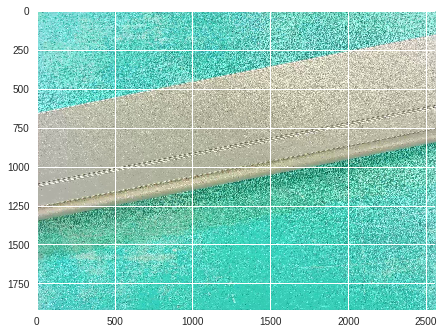

In [42]:
plt.imshow(img0)

In [43]:

# .DS_store contains in the file list
if '.DS_Store' in file_list:
    del file_list[file_list.index('.DS_Store')]
  
len (file_list)

2386

In [44]:
label_list = [] # get first 2 simplex character in file_name
for f in file_list:
    label_list.append(f[:2])
len(label_list)

2386

In [45]:
# check how many failure categories
uniq_label_list = list(set(label_list))
len(uniq_label_list)

12

In [46]:
uniq_label_list

['正常', '碰伤', '起坑', '涂层', '桔皮', '漏底', '脏点', '其他', '擦花', '横条', '不导', '凸粉']

In [80]:
from google.colab import files
files.upload()

{}

In [81]:
!ls

adc.json  drive  train_sample_total


In [82]:

with open('failure_to_label.pkl', 'rb') as handle:
    label_dict = pickle.load(handle)
label_dict  


{'不导': 1,
 '其他': 11,
 '凸粉': 8,
 '擦花': 2,
 '桔皮': 4,
 '横条': 3,
 '正常': 0,
 '涂层': 9,
 '漏底': 5,
 '碰伤': 6,
 '脏点': 10,
 '起坑': 7}

In [83]:
#Don't use this, instead use saved dict
'''
label_dict = {}
for i,l in enumerate(uniq_label_list):
    label_dict[l] = i
label_dict
'''

'\nlabel_dict = {}\nfor i,l in enumerate(uniq_label_list):\n    label_dict[l] = i\nlabel_dict\n'

In [0]:
# label the image according to the defect type
label_data = []
for f in file_list:
    label_data.append(label_dict[f[:2]])
label_data = np.array(label_data)
label_df = pd.DataFrame (label_data)

In [85]:
label_df.columns = ['label']
len(label_df)

2386

In [86]:
# Label Counts
label_df['label'].value_counts()

0     1018
5      388
10     209
2      165
11     160
8      104
4       90
6       77
7       54
3       47
1       39
9       35
Name: label, dtype: int64

In [87]:
# one hot encoding for label (for later NN usage)
one_hot_label_data = to_categorical(label_data)
one_hot_label_data.shape

(2386, 12)

In [0]:
# build model , using pre-trained Xception, include top = True
def build_model():
    inputs = Input(shape=(1920,2560,3))
    #inputs = Input(shape=(224,224,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    #base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    base_model = MobileNet(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.output
    print (x.get_shape)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    
    return model

In [59]:
model_1 = build_model()
# compile the model (should be done *after* setting layers to non-trainable)
model_1.compile(optimizer='Nadam', loss='categorical_crossentropy',metrics=['accuracy'])

17227776/17225924 [==============================] - 9s 1us/step
<bound method Tensor.get_shape of <tf.Tensor 'reshape_2/Reshape:0' shape=(?, 1000) dtype=float32>>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1920, 2560, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 1922, 2562, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 960, 1280, 32)     864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 960, 1280, 32)     128       
_________________________________________________________________
conv1_relu (Activation)      (None, 960, 1280, 32)     0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 962, 128

In [0]:
def first_prediction(model,data):
    pred_temp = model.predict(data)
    return pred_temp


In [0]:
# assign batch inferefcing of pre-traianed model to be 4 

def make_batch (file_ist,batch_size):
  final_list =[]
  
 
  floor = int(np.floor(len(file_list)/batch_size))
  print ('floor=', floor)
  for i in range(floor+1):
      if i < floor:
          final_list.append(file_list[i*batch_size:(i+1)*batch_size])
      else: 
          final_list.append(file_list[i*batch_size:])
          
  # check final_llist len equal to file_list  
  a =0 
  for l in final_list:
    #print (len(l))
    #print (l[-10:])
    a += len(l)
  if (a - len(final_list) == 0):  
    print ('total size', a, 'final_list length equal to file_list')
  else:
    print ('total size', a, 'file_list', len(file_list),'final_list length NOT equal to file_list')
    print (a - len(file_list))
    print ('warning, something wrong')
    
  return final_list  




In [62]:
batch_size = 5
final_list = make_batch(file_list,batch_size)
print (len(final_list))

floor= 477
total size 2386 file_list 2386 final_list length NOT equal to file_list
0
warning, something wrong
478


In [64]:
s= time.time()
final_array = []
for j,l in enumerate(final_list):
      img_list=[]
      for i,img in enumerate(l):
          img = load_img(src+img)  
          x = img_to_array(img)
          x = preprocess_input(x)
          #print (x.shape)
          #x = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
          #x = x/127.5 -1.
          img_list.append(x)
      #print ('img_list=', len(img_list))
      testing_data = np.array(img_list)

      #print ('testing_data_shape', testing_data.shape)
      #train_data =  train_data[:,:,:,np.newaxis]
      #print (testing_data.shape)
      pred_temp = first_prediction(model_1,testing_data)

      print('batch = ', j, 'stage 1 completed', 'shape=', pred_temp.shape)
      np.save(src_save+'temp_'+str(j)+'.npy',pred_temp)

      print ('bacth npy saved', j)
      e = time.time()
      print ('batch',j,'time=', round(e -s ,4))

      final_array.append(pred_temp)
      print ('afterbatch',j,'length=', len(final_array))

final_array = np.concatenate(final_array)
print ('final array', final_array.shape)
np.save(src_save+'train_data_densenet.npy',final_array)
print ('totally done, train data densent.npy')

batch =  0 stage 1 completed shape= (5, 1000)
bacth npy saved 0
batch 0 time= 9.7983
afterbatch 0 length= 1
batch =  1 stage 1 completed shape= (5, 1000)
bacth npy saved 1
batch 1 time= 14.4487
afterbatch 1 length= 2
batch =  2 stage 1 completed shape= (5, 1000)
bacth npy saved 2
batch 2 time= 18.6768
afterbatch 2 length= 3
batch =  3 stage 1 completed shape= (5, 1000)
bacth npy saved 3
batch 3 time= 23.059
afterbatch 3 length= 4
batch =  4 stage 1 completed shape= (5, 1000)
bacth npy saved 4
batch 4 time= 27.1328
afterbatch 4 length= 5
batch =  5 stage 1 completed shape= (5, 1000)
bacth npy saved 5
batch 5 time= 31.6789
afterbatch 5 length= 6
batch =  6 stage 1 completed shape= (5, 1000)
bacth npy saved 6
batch 6 time= 35.9717
afterbatch 6 length= 7
batch =  7 stage 1 completed shape= (5, 1000)
bacth npy saved 7
batch 7 time= 40.3543
afterbatch 7 length= 8
batch =  8 stage 1 completed shape= (5, 1000)
bacth npy saved 8
batch 8 time= 44.6489
afterbatch 8 length= 9
batch =  9 stage 1 co

In [0]:
np.save(src_save+'train_data_densenet.npy',final_array)

In [66]:
#final_array = np.concatenate(final_array)
final_array.shape

(2386, 1000)

In [101]:
len(label_data)

499

In [0]:
train_x,val_x,train_y,val_y = train_test_split(final_array,label_data,test_size=0.2,shuffle=True)

In [89]:

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1.fit(train_x,train_y)


from sklearn.metrics import accuracy_score
val_pred = xgb1.predict(val_x)

predictions = [round(value) for value in val_pred]
# evaluate predictions
accuracy = accuracy_score(val_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 91.21%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
import pickle
with open (src_save+'xgb_densenet12_correct.pkl','wb') as handle:
  pickle.dump(xgb1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [91]:
print (val_x.shape, val_y.shape)

(478, 1000) (478,)


In [92]:
print (predictions)

[0, 0, 0, 0, 5, 5, 0, 4, 0, 8, 0, 5, 0, 0, 4, 11, 0, 2, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 2, 5, 0, 7, 0, 4, 11, 5, 0, 0, 0, 0, 5, 0, 0, 9, 11, 0, 0, 0, 6, 5, 0, 5, 5, 1, 10, 5, 2, 0, 8, 0, 5, 5, 5, 0, 5, 0, 6, 10, 0, 5, 0, 0, 2, 0, 0, 10, 0, 2, 5, 4, 1, 0, 0, 0, 2, 3, 0, 0, 8, 5, 10, 5, 0, 10, 10, 11, 5, 2, 5, 0, 0, 0, 10, 1, 0, 3, 8, 2, 8, 4, 5, 5, 0, 0, 2, 0, 0, 11, 10, 0, 0, 10, 5, 0, 0, 0, 0, 11, 4, 0, 1, 0, 10, 2, 5, 0, 0, 0, 0, 2, 11, 0, 0, 0, 2, 0, 0, 10, 0, 11, 0, 2, 0, 5, 0, 0, 0, 0, 0, 5, 6, 11, 0, 3, 7, 10, 0, 5, 5, 0, 5, 8, 0, 5, 0, 0, 5, 5, 0, 11, 6, 0, 8, 10, 0, 10, 0, 5, 0, 0, 5, 5, 0, 0, 6, 0, 1, 0, 5, 0, 8, 0, 5, 0, 8, 5, 5, 8, 0, 10, 0, 0, 5, 0, 11, 0, 0, 4, 5, 0, 0, 0, 0, 2, 5, 5, 3, 0, 7, 0, 6, 7, 0, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 7, 2, 0, 5, 0, 0, 5, 10, 0, 0, 0, 0, 5, 1, 5, 10, 10, 5, 0, 10, 8, 11, 0, 6, 0, 0, 10, 5, 0, 0, 5, 2, 0, 5, 8, 0, 0, 5, 11, 0, 0, 2, 0, 4, 5, 2, 5, 0, 0, 5, 8, 0, 10, 5, 0, 0, 4, 3, 11, 8, 0, 0, 0, 10, 5, 0, 0, 0, 0, 0, 1, 

In [93]:
print (val_y)

[ 0  0  5  0  5  5  0  4  0  8  0  5  0  0  4 11  0  2  0  5  0  0  0  0
  5  5  0  5 10  5  0  7  0  4 11  5  0  0  0  0  5  0  2  9 11  0  0  0
  6  5  0  5  5  1  6  5  2  0  8  0  5  5  5  0  5  0  6 10  0  5  0  0
  2  0  0 10  2  2  5  4  6  0  0  0  2  3  0  0  8  5 10  5  0 10 11 11
  5  2  5  0  0  0  0  1  0  3  8  2  8  4  5  5  0  0  2  0  0 11 10  0
  0  6  5  0  0  0  0 11  4  0 11  0 10  2  5  2  0  0  0  2 11  0  0  0
  2  0  0 10  0 10  0  2 11  5  0  0  0  0  0  5  6  6  0  3  7 10  0  5
  5  0  5  8  0  5  0  0  5  5  0 11  6  0  8 10  0 10  0  5  0  0  5  5
  0  0  6  0  1  0  5  0  8  0  5  0  8  5  5  8  0 10  0  0  5  0 11  0
  0  4  5  0  0  0  0  2  5  5  3  0  7  0  6  7  0  0  0  5  0  4  0  5
 11  0  0  0  0  0  3  5  0  0  7  2  0  5  0  0  5 10  0  0  0  0  1  1
  5 10 10  5  0 10  8 11  0  8  0  7  6  5  0  0  5  2  0  5  8  0  7  5
 11  0  0  2  9  4  5  2  5 10  0  5  8  0 10  4  0  0  4  3 11  8  0  0
  0 10  5  0  0  0  0  0  1  5  0  0  0  0  6  0  7

failure_to_label.pkl   manu_big_data		Untitled0.ipynb
label_to_category.pkl  train_data_densenet.npy	xgb_densenet12.pkl
